In [1]:
# import splitfolders

In [2]:
# pip install split-folders

In [3]:
# splitfolders.ratio("IMAGES",output="IMAGES2",seed=1337,ratio=(0.8,0.1,0.1))

In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import tensorflow
from keras.models import Sequential
from keras.layers import ReLU,PReLU
from keras.layers import Dense,Flatten,Input

In [5]:
from keras.layers import Conv2D

In [6]:
#now first we create a keras tunner

In [7]:
from kerastuner import RandomSearch

C:\Users\Parthraj\AppData\Local\Temp\ipykernel_8640\659161079.py:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner import RandomSearch


In [8]:
def model_creation(hp):
    model=Sequential()
    model.add(Input(shape=(64, 64, 3)))
    for i in range(hp.Int("num_layers", 2, 20)):
        model.add(Conv2D(filters=hp.Int("conv_1_filters" + str(i),min_value=32,max_value=128,step=16),
        kernel_size=hp.Choice("conv_1_kernel" + str(i),values=[3,5]),
        activation="relu",
        input_shape=(28,28,1)
        )),
    model.add(Flatten()),
    for j in range(hp.Int("num_layers_1", 2, 20)):
        model.add(Dense(
        units=hp.Int('dense_1_units'+ str(j), min_value=32, max_value=128, step=16),
        activation='relu')),
    model.add(Dense(units=1,activation="sigmoid"))    
    model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
    return model

In [9]:
# def model_creation(hp):
#     model=Sequential()
#     model.add(Input(shape=(64, 64, 3)))
# #     for i in range(hp.Int("num_layers", 2, 20)):
#     model.add(Conv2D(filters=hp.Int("conv_1_filters",min_value=32,max_value=128,step=16),
#     kernel_size=hp.Choice("conv_1_kernel",values=[3,5]),
#     activation="relu",
#     input_shape=(28,28,1))),
#     model.add(Flatten()),
#     for j in range(hp.Int("num_layers_1", 2, 20)):
#         model.add(Dense(
#         units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
#         activation='relu')),
#     model.add(Dense(units=1,activation="sigmoid"))    
#     model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
#     return model

In [10]:
tuner = RandomSearch(model_creation, objective = "val_accuracy", max_trials= 5, executions_per_trial= 3 )

C:\Users\Parthraj\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
from keras.preprocessing import image

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array,array_to_img

In [13]:
train_path="IMAGES2/train"
train_datagen=ImageDataGenerator(rescale=1/255)
train_data= train_datagen.flow_from_directory(train_path, batch_size=32, target_size=(64,64),class_mode="binary")
val_path="IMAGES2/val"
val_data=train_datagen.flow_from_directory(val_path, batch_size=32, target_size=(64,64),class_mode="binary")

Found 19998 images belonging to 2 classes.
Found 2498 images belonging to 2 classes.


In [14]:
train_data.class_indices

{'Cat': 0, 'Dog': 1}

In [15]:
train_data.classes.shape

(19998,)

In [16]:
import os

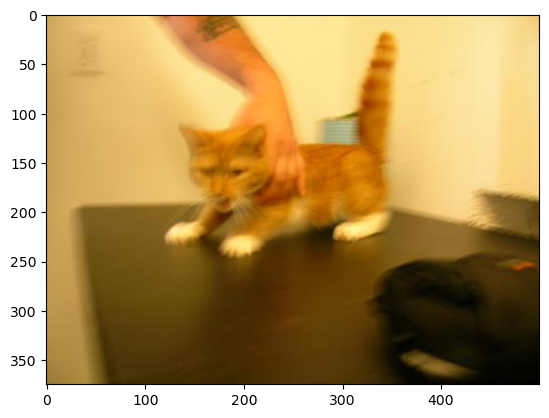

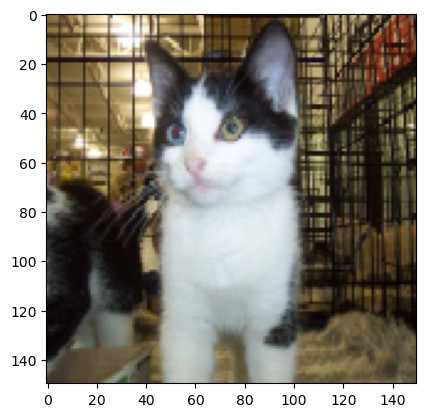

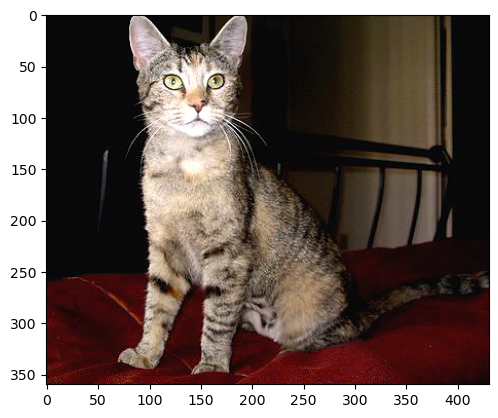

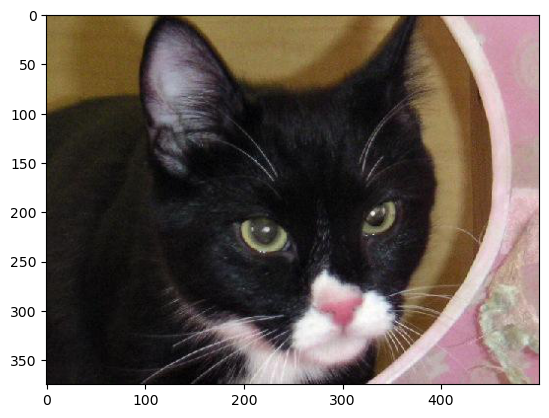

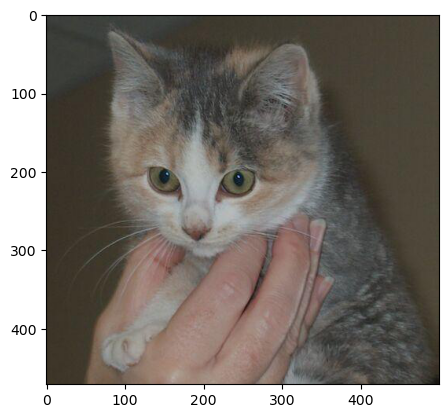

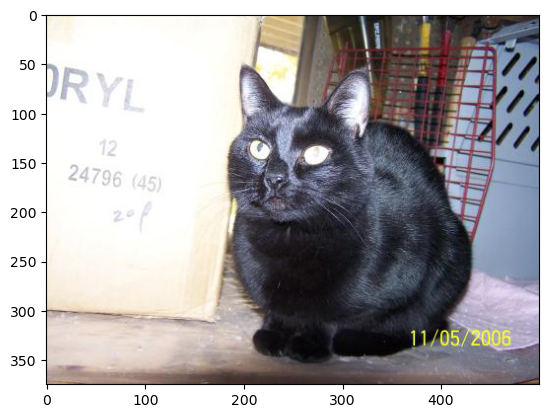

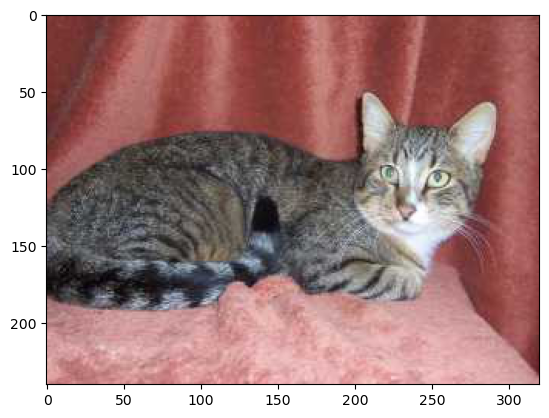

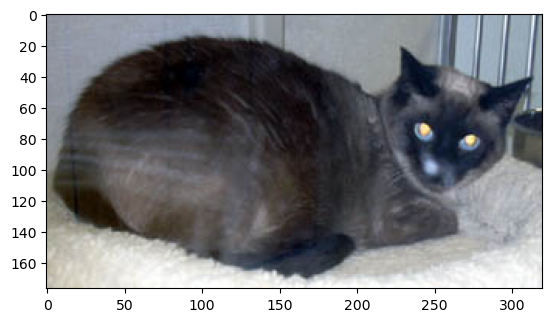

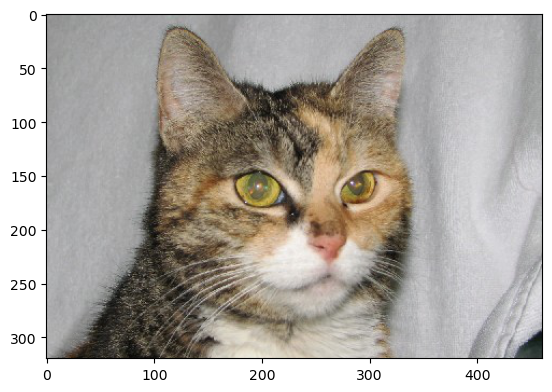

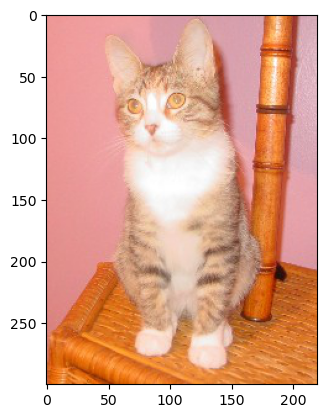

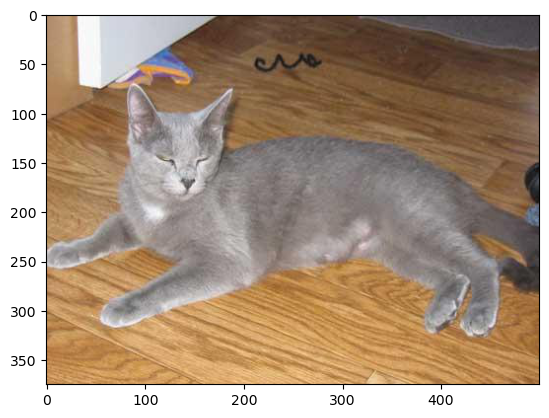

In [17]:
dir_path = "IMAGES2/train/cat"
j=0
for i in os.listdir(dir_path):
    img = image.load_img(dir_path+"//"+i)
    plt.imshow(img)
    plt.show()
    j+=1;
    if j>10:
        break

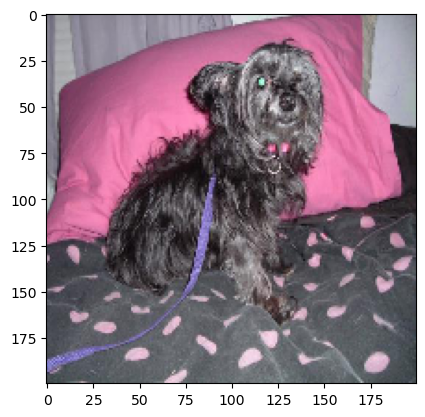

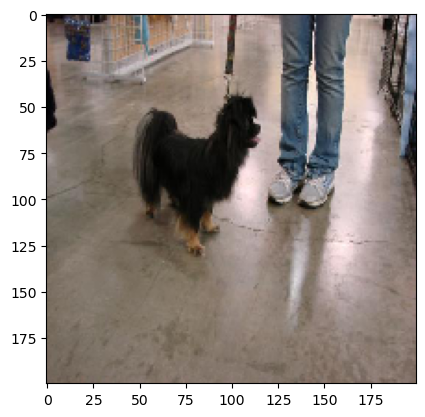

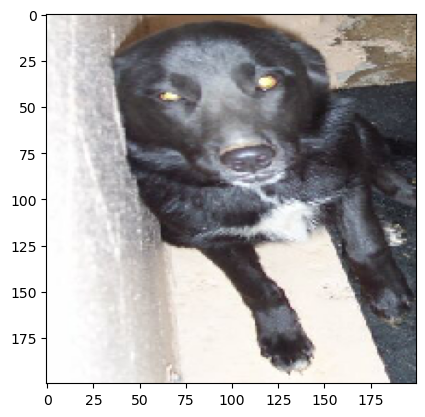

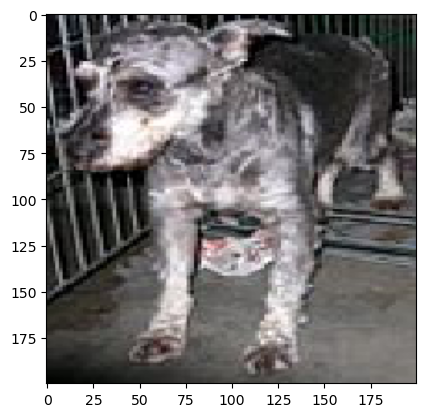

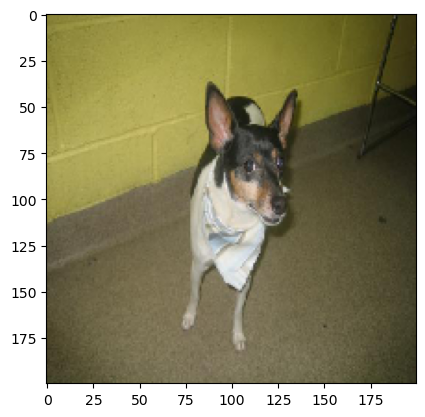

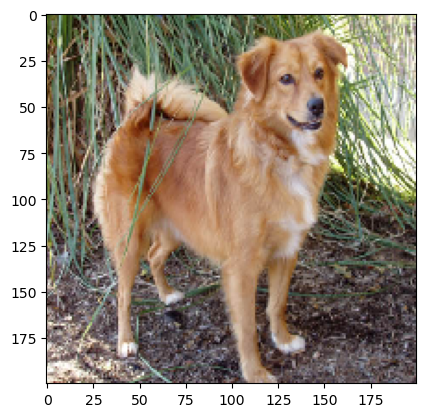

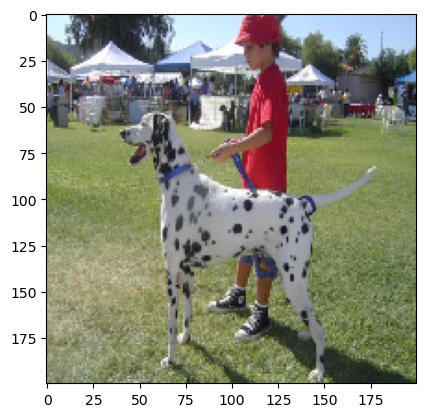

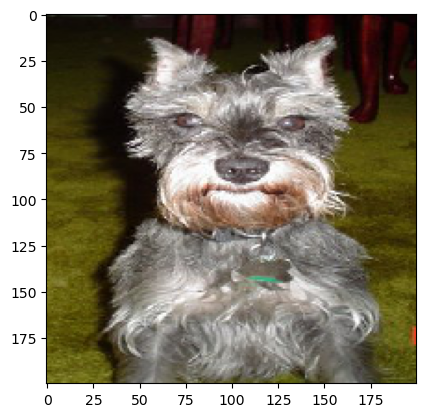

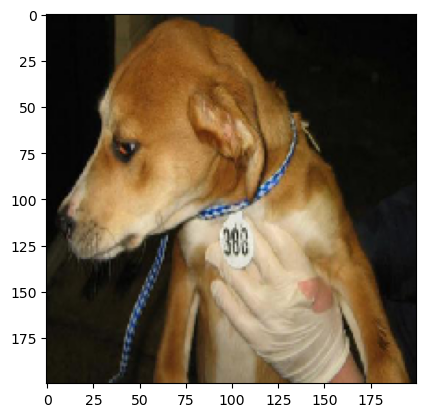

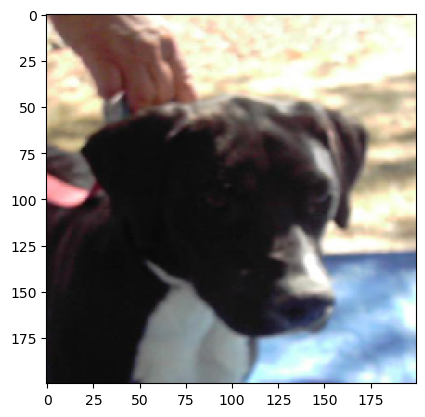

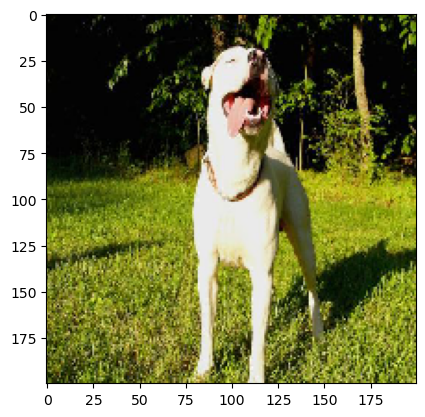

In [18]:
dir_path = "IMAGES2/train/dog"
j=0
for i in os.listdir(dir_path):
    img = image.load_img(dir_path+"//"+i,target_size=(200,200))
    plt.imshow(img)
    plt.show()
    j+=1;
    if j>10:
        break

In [19]:
import numpy as np

# Initialize lists to collect data
subset_images = []
subset_labels = []

# Number of samples you want to extract
num_samples = 2000

# Iterate over the DirectoryIterator
for i, (images, labels) in enumerate(train_data):
    # Append the images and labels to the lists
    subset_images.extend(images)
    subset_labels.extend(labels)

    # Break the loop once we have collected enough samples
    if len(subset_images) >= num_samples:
        subset_images = np.array(subset_images[:num_samples])
        subset_labels = np.array(subset_labels[:num_samples])
        break

# Now `subset_images` and `subset_labels` contain the subset of data


In [20]:
subset_images.shape

(2000, 64, 64, 3)

In [21]:
subset_labels.shape

(2000,)

In [22]:
tuner.search(subset_images,subset_labels,epochs=3,validation_data=val_data)

Trial 3 Complete [00h 10m 35s]
val_accuracy: 0.5

Best val_accuracy So Far: 0.5
Total elapsed time: 00h 25m 01s

Search: Running Trial #4

Value             |Best Value So Far |Hyperparameter
17                |9                 |num_layers
112               |128               |conv_1_filters0
5                 |3                 |conv_1_kernel0
48                |80                |conv_1_filters1
3                 |5                 |conv_1_kernel1
2                 |17                |num_layers_1
128               |32                |dense_1_units0
80                |128               |dense_1_units1
32                |32                |conv_1_filters2
3                 |3                 |conv_1_kernel2
64                |32                |conv_1_filters3
5                 |3                 |conv_1_kernel3
112               |32                |conv_1_filters4
3                 |3                 |conv_1_kernel4
64                |32                |conv_1_filters5
5            

KeyboardInterrupt: 

In [23]:
tuner.results_summary()

Results summary
Results in .\untitled_project
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 0 summary
Hyperparameters:
num_layers: 9
conv_1_filters0: 128
conv_1_kernel0: 3
conv_1_filters1: 80
conv_1_kernel1: 5
num_layers_1: 17
dense_1_units0: 32
dense_1_units1: 128
conv_1_filters2: 32
conv_1_kernel2: 3
conv_1_filters3: 32
conv_1_kernel3: 3
conv_1_filters4: 32
conv_1_kernel4: 3
conv_1_filters5: 32
conv_1_kernel5: 3
conv_1_filters6: 32
conv_1_kernel6: 3
conv_1_filters7: 32
conv_1_kernel7: 3
conv_1_filters8: 32
conv_1_kernel8: 3
dense_1_units2: 32
dense_1_units3: 32
dense_1_units4: 32
dense_1_units5: 32
dense_1_units6: 32
dense_1_units7: 32
dense_1_units8: 32
dense_1_units9: 32
dense_1_units10: 32
dense_1_units11: 32
dense_1_units12: 32
dense_1_units13: 32
dense_1_units14: 32
dense_1_units15: 32
dense_1_units16: 32
Score: 0.5

Trial 1 summary
Hyperparameters:
num_layers: 4
conv_1_filters0: 32
conv_1_kernel0: 3
conv_1_filters1: 48
conv_1_kernel1: 3
num_layer

In [27]:
model_1=Sequential()
model_1.add(Conv2D(filters=128 , kernel_size=3,activation="relu"))
model_1.add(Conv2D(filters=64, kernel_size=3,activation="relu"))
model_1.add(Conv2D(filters=64 , kernel_size=3,activation="relu"))
model_1.add(Flatten())
model_1.add(Dense(units=128,activation="relu"))
model_1.add(Dense(units=64,activation="relu"))
model_1.add(Dense(units=32,activation="relu"))
model_1.add(Dense(units=1,activation="sigmoid"))
model_1.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [28]:
model_1.fit(train_data,epochs=3,batch_size=32,validation_data=val_data)

Epoch 1/3
201/625 ━━━━━━━━━━━━━━━━━━━━ 3:34 506ms/step - accuracy: 0.5188 - loss: 0.8344

C:\ProgramData\anaconda3\Lib\site-packages\PIL\TiffImagePlugin.py:858: UserWarning: Truncated File Read
  warnings.warn(str(msg))


625/625 ━━━━━━━━━━━━━━━━━━━━ 329s 521ms/step - accuracy: 0.5369 - loss: 0.7458 - val_accuracy: 0.5757 - val_loss: 0.6710
Epoch 2/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 341s 545ms/step - accuracy: 0.5883 - loss: 0.6665 - val_accuracy: 0.6257 - val_loss: 0.6429
Epoch 3/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 326s 520ms/step - accuracy: 0.6838 - loss: 0.5929 - val_accuracy: 0.6637 - val_loss: 0.6110


In [40]:
#  for i in os.listdir("IMAGES2/test/"):
#         img=image.load_img(r"IMAGES2/test/"+i/,"1.jpg",target_size=(64,64))
#         plt.imshow(img)
#         plt.show()
#         ans=model_1.predict(img)
#         ans.class_labels(ans)

In [109]:
picture=image.load_img("IMAGES2/test/dog/10187.jpg",target_size=(64,64))

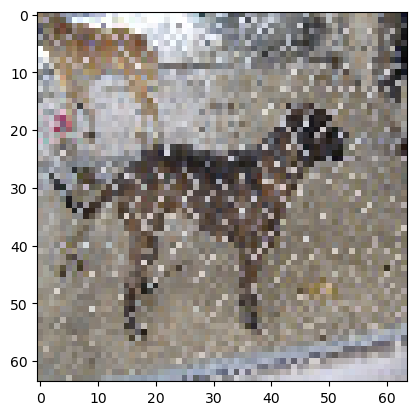

In [110]:
plt.imshow(picture)

In [111]:
picture=image.img_to_array(picture)

In [125]:
picture=picture/255
IA = np.expand_dims(picture,axis=0)
testimg = np.vstack([IA])
ans=model_1.predict(testimg)
ans=np.argmax(ans[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


In [126]:
ans

0

In [121]:
class_indices[ans]

NameError: name 'class_indices' is not defined

In [87]:
train_data.class_indices

{'Cat': 0, 'Dog': 1}

In [93]:
train_data.classes

array([0, 0, 0, ..., 1, 1, 1])

In [115]:
# dir_path = 'IMAGES2/test/'

# for i in os.listdir(dir_path):
#     img = image.load_img(open(dir_path+"//"+i,"wb"),target_size=(64,64))
# #     plt.imshow(img)
# #     plt.show()
    
#     IA = image.img_to_array(img)
#     IA = np.expand_dims(IA,axis=0)
#     testimg = np.vstack([IA])
#     ans = model.predict(testimg)
#     class_names(ans)
#     print(ans)

PermissionError: [Errno 13] Permission denied: 'IMAGES2/test///Cat'